# Pyregion Test
Test pyregion to get image physical coordinates from a region file



In [1]:
import pyregion

from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from astropy.nddata.utils import Cutout2D
from astropy.wcs import WCS
from spectral_cube import SpectralCube

ModuleNotFoundError: No module named 'pyregion'

In [9]:
cube = fits.open('NGC1275.fits')
header = cube[0].header

# read region file
rr = pyregion.open('test_rec.reg')

# convert coordinates to image coordinates
rrim = rr.as_imagecoord(header)

# Read header
wcs = WCS(header)

In [10]:
# Obtain central x and y coordinates as well as the radius
print(rrim[0].coord_list)
x_cen, y_cen, x_len, y_len, igno = rrim[0].coord_list


[2.9500816153648977, 9.390448542963284, 2.5216107572826494, 6.214410824626725, 2.792679301712858]


In [11]:
np.ceil(x_len)
cube[0].data

array([[-136.7858 , -133.93361, -132.81137, -130.96677, -131.09125],
       [-137.56377, -135.53464, -131.6234 , -130.83507, -130.65103],
       [-137.2838 , -136.56265, -132.04095, -132.92117, -131.63214],
       [-138.14172, -135.10088, -134.75774, -136.03506, -133.9753 ],
       [-138.32278, -135.81114, -134.37373, -133.99008, -134.04428],
       [-136.16634, -137.23952, -135.75952, -134.33182, -134.06131],
       [-138.30016, -138.83455, -140.39214, -137.42569, -138.2697 ],
       [-137.0312 , -136.33282, -137.88431, -138.68172, -137.60295],
       [-137.03723, -134.50972, -137.6755 , -138.88557, -138.48859],
       [-139.33075, -136.69724, -140.02359, -139.49629, -139.25494],
       [-139.36183, -138.3834 , -139.62833, -140.80118, -141.07465],
       [-138.55463, -138.14363, -134.7213 , -138.05981, -139.97522],
       [-135.03114, -135.54884, -136.11536, -139.59845, -140.4513 ],
       [-132.78514, -137.56207, -135.90503, -137.26468, -139.39104],
       [-130.53703, -132.54521, -1

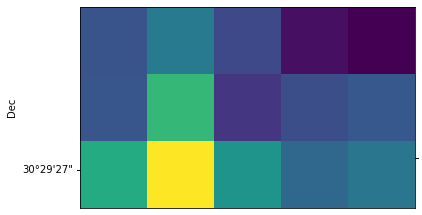

In [12]:
cutout = Cutout2D(cube[0].data, (x_cen, y_cen), (np.ceil(x_len), np.ceil(y_len)), wcs=wcs)
fig = plt.figure()
#ax = plt.subplot()
ax = plt.subplot(projection=wcs)
ax.set_xlabel('RA')
ax.set_ylabel('Dec')
ax.imshow(cutout.data, cmap='viridis',origin='lower')
ra = ax.coords[0]
ra.set_major_formatter('hh:mm:ss')
dec = ax.coords[1]
dec.set_major_formatter('dd:mm:ss');

In [13]:
cutout.data

array([[-137.03723, -134.50972, -137.6755 , -138.88557, -138.48859],
       [-139.33075, -136.69724, -140.02359, -139.49629, -139.25494],
       [-139.36183, -138.3834 , -139.62833, -140.80118, -141.07465]],
      dtype=float32)

In [14]:
# Create boolean mask
mask = pyregion.get_mask(rrim, cube[0])
# Apply mask to data
masked = np.ma.masked_array(cube[0].data, ~mask)

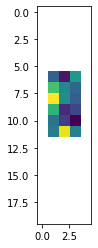

In [15]:
plt.imshow(masked)